In [83]:
def count_values(arr):
  unique_values, counts = np.unique(arr, return_counts=True)

  # Print the unique values and their frequencies
  for value, count in zip(unique_values, counts):
      print(f"{value}: {count}")

In [84]:
def segmantation(X,y,window_length=36 ,step_size=1):
      # Define sliding window parameters
        # Amount of overlap between segments
      # Segment the time series data with sliding window
      segments = []
      labels = []

      for i in range(0, len(X) - window_length, step_size):
          segment = X[i:i+window_length]
          segments.append(segment)
          
          # Assign label to the segment based on the presence of anomalies
          segment_labels = y[i:i+window_length]
          if np.any(segment_labels == 1):
              label = 1  # Anomaly present
          else:
              label = 0  # No anomaly
          labels.append(label)

      # Convert segments and labels to numpy arrays
      segments = np.array(segments)
      labels = np.array(labels)
      return segments,labels

In [85]:
def split_data_balanced(X, y, test_size=0.2, random_state=None):
    """
    Split data into train and test sets with balanced labels.

    Parameters:
    - X: Input features (numpy array or pandas DataFrame)
    - y: Target labels (numpy array or pandas Series)
    - test_size: Proportion of the data to be used for testing (default: 0.2)
    - random_state: Random seed for reproducibility (default: None)

    Returns:
    - X_train: Training set features
    - X_test: Testing set features
    - y_train: Training set labels
    - y_test: Testing set labels
    """
    # Find unique labels and their counts
    unique_labels, label_counts = np.unique(y, return_counts=True)

    # Find the minimum label count
    min_label_count = np.min(label_counts)

    # Split the data for each label, ensuring balanced classes in the test set
    X_train, X_test, y_train, y_test = [], [], [], []
    for label in unique_labels:
        # Split the data for the current label
        X_label = X[y == label]
        y_label = y[y == label]
        X_label_train, X_label_test, y_label_train, y_label_test = train_test_split(
            X_label, y_label, test_size=test_size, random_state=random_state
        )

        # Add the split data to the overall train and test sets
        X_train.append(X_label_train)
        X_test.append(X_label_test)
        y_train.append(y_label_train)
        y_test.append(y_label_test)

    # Concatenate the data from all labels
    X_train = np.concatenate(X_train)
    X_test = np.concatenate(X_test)
    y_train = np.concatenate(y_train)
    y_test = np.concatenate(y_test)

    return X_train, X_test, y_train, y_test


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path ="/content/drive/MyDrive/Dataset pfe/data_kick.xlsx"
df=pd.read_excel(file_path)
df = df[~df['id'].isin(['19.xlsx','15','26.xlsx','29.xlsx','15.xlsx'])]

Well 6,17,8

In [88]:
df = df[~df['id'].isin(['19.xlsx','15','26.xlsx','29.xlsx','15.xlsx'])]

In [89]:
X = df[[ 'TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']].values
y = df['STATUS'].values

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Select the columns to normalize
# Perform the min-max normalization
X= scaler.fit_transform(X)

In [91]:
window=36
segments,labels= segmantation(X,y,window_length=window ,step_size=1)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = split_data_balanced(segments, labels, test_size=0.2)
/# Reshape the feature matrices for SVM
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape,X_test.shape)

(23558, 144) (5891, 144)


In [93]:
count_values(y_test)
count_values(y_train)

0: 5778
1: 113
0: 23108
1: 450


In [94]:
from sklearn.svm import SVC


svm = SVC(kernel='rbf', C=0.1, gamma=1, random_state=42)
svm.fit(X_train, y_train)

        # Evaluate the model


SVC(C=0.1, gamma=1, random_state=42)

In [95]:
print('score:',(svm.score(X_train,y_train)))
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("ROC AUC Score:",  roc_auc_score(y_test, y_pred))

score: 0.9914678665421512
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5778
           1       0.94      0.60      0.74       113

    accuracy                           0.99      5891
   macro avg       0.97      0.80      0.87      5891
weighted avg       0.99      0.99      0.99      5891

[[5774    4]
 [  45   68]]
Accuracy: 0.9916822271261246
Precision: 0.9444444444444444
Recall: 0.6017699115044248
F1 Score: 0.7351351351351352
ROC AUC Score: 0.8005388152191559


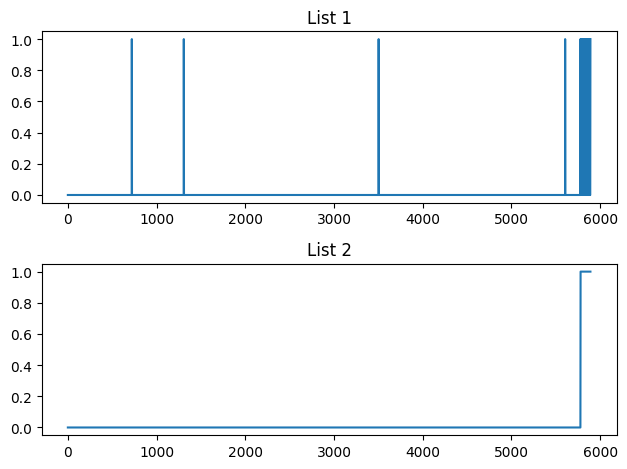

In [96]:
import matplotlib.pyplot as plt

# Example lists
list1 = y_pred
list2 = y_test

# Create a figure with subplots
fig, axs = plt.subplots(2, 1)

# Plot the first list in the first subplot
axs[0].plot(list1)

# Set a title for the first subplot
axs[0].set_title('List 1')

# Plot the second list in the second subplot
axs[1].plot(list2)

# Set a title for the second subplot
axs[1].set_title('List 2')

# Display the figure
plt.tight_layout()
plt.show()

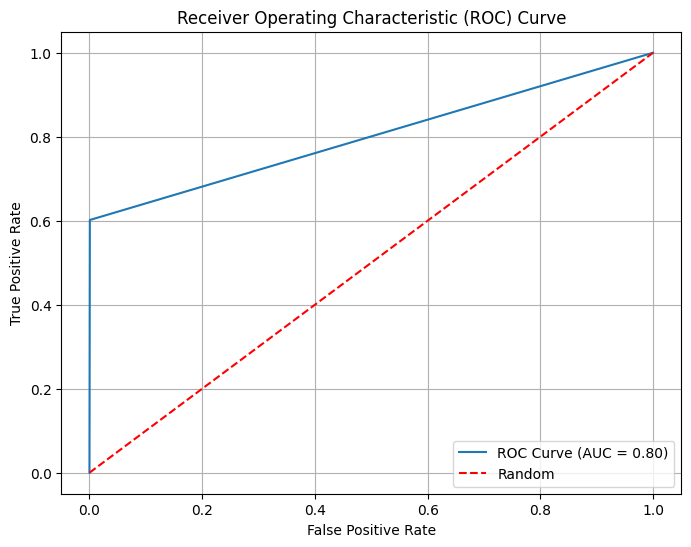

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate false positive rate, true positive rate, and thresholds for ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred)

# Calculate precision, recall, and thresholds for PRC
precision, recall, prc_thresholds = precision_recall_curve(y_test, y_pred)

# Calculate area under the curve (AUC) for ROC
roc_auc = auc(fpr, tpr)

# Calculate area under the curve (AUC) for PRC
prc_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




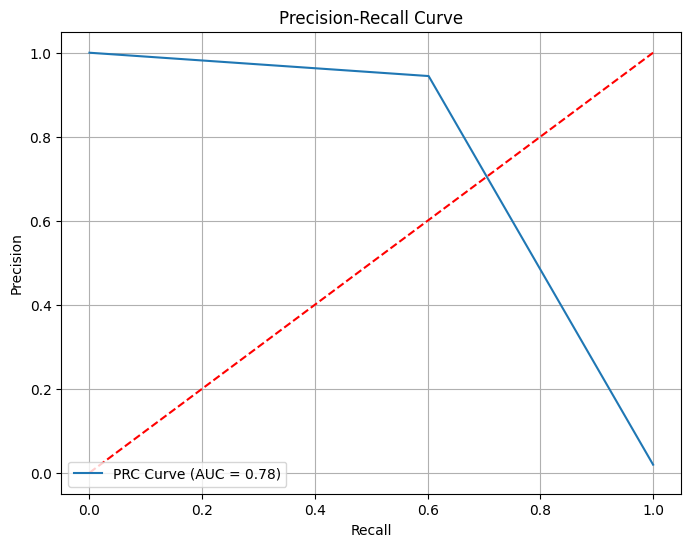

In [98]:
# Plot PRC Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PRC Curve (AUC = {prc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# well 19,26,15,29

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path ="/content/drive/MyDrive/Dataset pfe/data_kick.xlsx"
df=pd.read_excel(file_path)
df = df[~df['id'].isin(['17.xlsx','6.xlsx','8.xlsx'])]

In [100]:
X = df[[ 'TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']].values
y = df['STATUS'].values

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Select the columns to normalize
# Perform the min-max normalization
X= scaler.fit_transform(X)

In [102]:
window=36
segments,labels= segmantation(X,y,window_length=window ,step_size=1)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = split_data_balanced(segments, labels, test_size=0.2)
# Reshape the feature matrices for SVM
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape,X_test.shape)

(18982, 144) (4747, 144)


In [104]:
count_values(y_test)
count_values(y_train)

0: 4577
1: 170
0: 18304
1: 678


In [105]:
from sklearn.svm import SVC


svm = SVC(kernel='rbf', C=0.1, gamma=1, random_state=42)
svm.fit(X_train, y_train)

        # Evaluate the model


SVC(C=0.1, gamma=1, random_state=42)

In [106]:
print('score:',(svm.score(X_train,y_train)))
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("ROC AUC Score:",  roc_auc_score(y_test, y_pred))

score: 0.9757665156464018
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4577
           1       1.00      0.28      0.43       170

    accuracy                           0.97      4747
   macro avg       0.99      0.64      0.71      4747
weighted avg       0.97      0.97      0.97      4747

[[4577    0]
 [ 123   47]]
Accuracy: 0.9740888982515273
Precision: 1.0
Recall: 0.27647058823529413
F1 Score: 0.4331797235023042
ROC AUC Score: 0.638235294117647


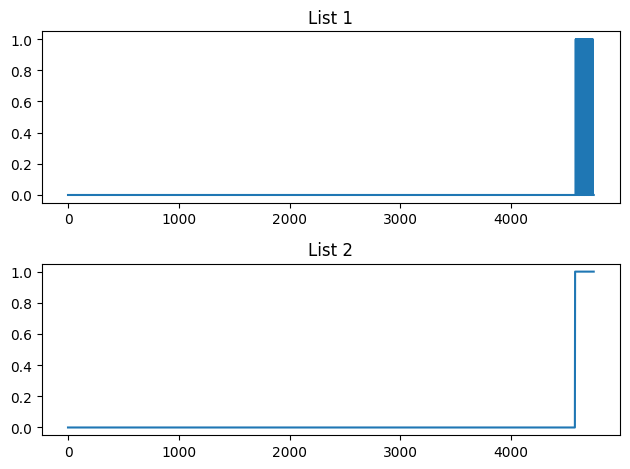

In [107]:
import matplotlib.pyplot as plt

# Example lists
list1 = y_pred
list2 = y_test

# Create a figure with subplots
fig, axs = plt.subplots(2, 1)

# Plot the first list in the first subplot
axs[0].plot(list1)

# Set a title for the first subplot
axs[0].set_title('List 1')

# Plot the second list in the second subplot
axs[1].plot(list2)

# Set a title for the second subplot
axs[1].set_title('List 2')

# Display the figure
plt.tight_layout()
plt.show()


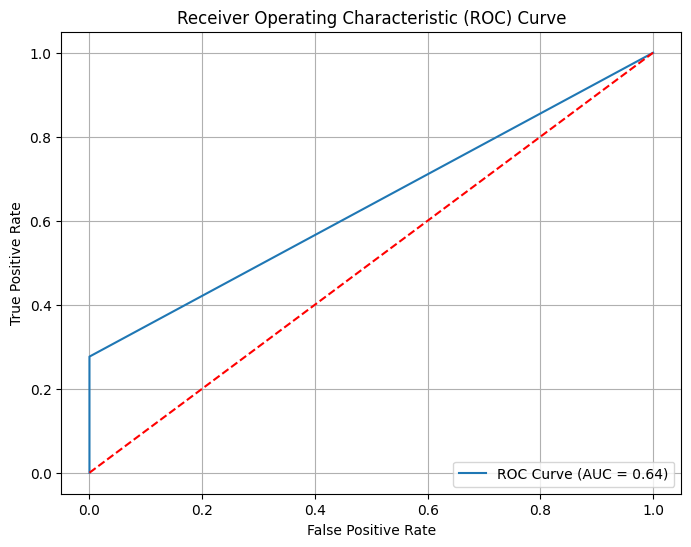

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate false positive rate, true positive rate, and thresholds for ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred)

# Calculate precision, recall, and thresholds for PRC
precision, recall, prc_thresholds = precision_recall_curve(y_test, y_pred)

# Calculate area under the curve (AUC) for ROC
roc_auc = auc(fpr, tpr)

# Calculate area under the curve (AUC) for PRC
prc_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




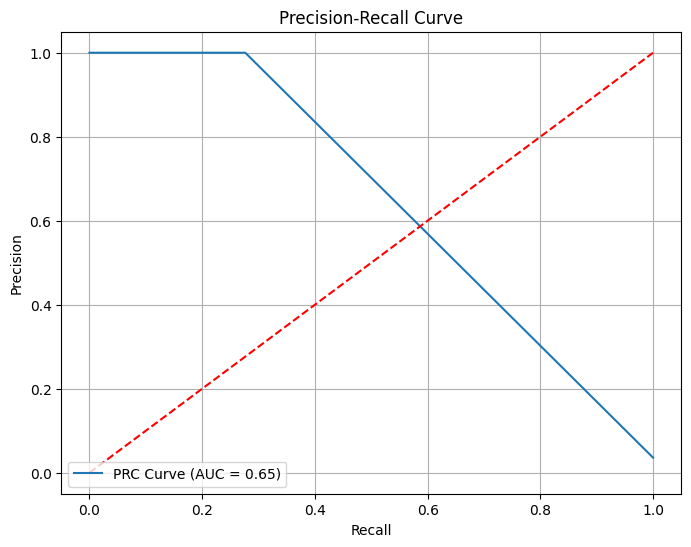

In [109]:
# Plot PRC Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PRC Curve (AUC = {prc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [110]:
count_values(y_pred)

0: 4700
1: 47


# All data 

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path ="/content/drive/MyDrive/Dataset pfe/data_kick.xlsx"
df=pd.read_excel(file_path)


In [112]:
X = df[[ 'TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)']].values
y = df['STATUS'].values

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Select the columns to normalize
# Perform the min-max normalization
X= scaler.fit_transform(X)

In [114]:
window=36
segments,labels= segmantation(X,y,window_length=window ,step_size=1)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = split_data_balanced(segments, labels, test_size=0.2)
# Reshape the feature matrices for SVM
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape,X_test.shape)

(42570, 144) (10644, 144)


In [116]:
count_values(y_test)
count_values(y_train)

0: 10354
1: 290
0: 41413
1: 1157


In [117]:
from sklearn.svm import SVC


svm = SVC(kernel='rbf', C=0.1, gamma=1, random_state=42)
svm.fit(X_train, y_train)

        # Evaluate the model


SVC(C=0.1, gamma=1, random_state=42)

In [118]:
print('score:',(svm.score(X_train,y_train)))
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("ROC AUC Score:",  roc_auc_score(y_test, y_pred))

score: 0.9789053323937045
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10354
           1       1.00      0.22      0.36       290

    accuracy                           0.98     10644
   macro avg       0.99      0.61      0.67     10644
weighted avg       0.98      0.98      0.97     10644

[[10354     0]
 [  227    63]]
Accuracy: 0.978673431040962
Precision: 1.0
Recall: 0.21724137931034482
F1 Score: 0.35694050991501414
ROC AUC Score: 0.6086206896551725


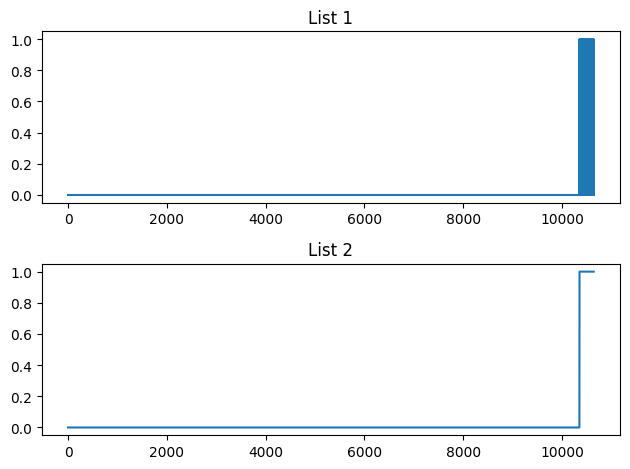

In [119]:
import matplotlib.pyplot as plt

# Example lists
list1 = y_pred
list2 = y_test

# Create a figure with subplots
fig, axs = plt.subplots(2, 1)

# Plot the first list in the first subplot
axs[0].plot(list1)

# Set a title for the first subplot
axs[0].set_title('List 1')

# Plot the second list in the second subplot
axs[1].plot(list2)

# Set a title for the second subplot
axs[1].set_title('List 2')

# Display the figure
plt.tight_layout()
plt.show()


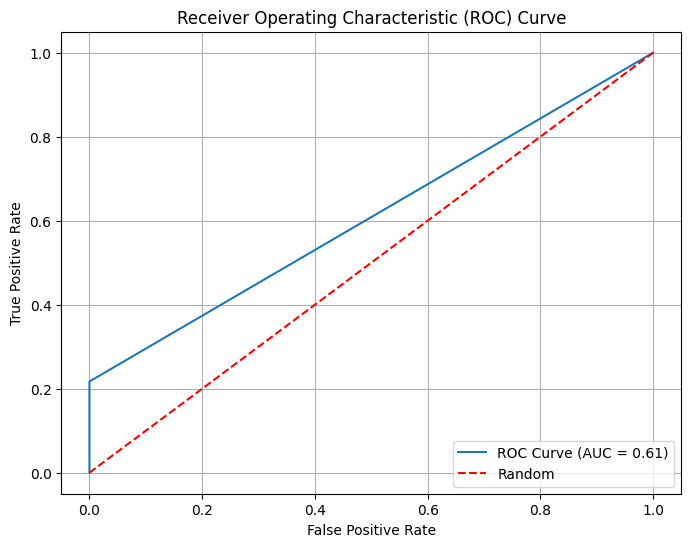

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate false positive rate, true positive rate, and thresholds for ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred)

# Calculate precision, recall, and thresholds for PRC
precision, recall, prc_thresholds = precision_recall_curve(y_test, y_pred)

# Calculate area under the curve (AUC) for ROC
roc_auc = auc(fpr, tpr)

# Calculate area under the curve (AUC) for PRC
prc_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




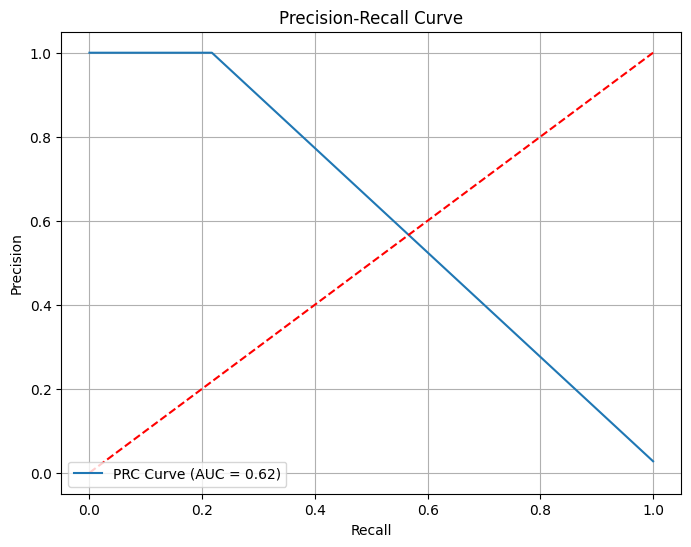

In [121]:
# Plot PRC Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PRC Curve (AUC = {prc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [ ]:
(y_test[10000:])

In [133]:
test_y=y_test[10000:]
test_x=X_test[10000:]

In [134]:
y_pred = svm.predict(test_x)
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))
print("Accuracy:", accuracy_score(test_y, y_pred))
print("Precision:", precision_score(test_y, y_pred))
print("Recall:", recall_score(test_y, y_pred))
print("F1 Score:",f1_score(test_y, y_pred))
print("ROC AUC Score:",  roc_auc_score(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       354
           1       1.00      0.22      0.36       290

    accuracy                           0.65       644
   macro avg       0.80      0.61      0.56       644
weighted avg       0.79      0.65      0.58       644

[[354   0]
 [227  63]]
Accuracy: 0.6475155279503105
Precision: 1.0
Recall: 0.21724137931034482
F1 Score: 0.35694050991501414
ROC AUC Score: 0.6086206896551725
